<a href="https://colab.research.google.com/github/UltraTsar/NonTrivialRepE_Timeline/blob/main/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kruskal-Wallis H-test:
H-statistic: 33.073623188405804
p-value: 5.973516146416213e-05

Permutation test:
p-value: 0.0


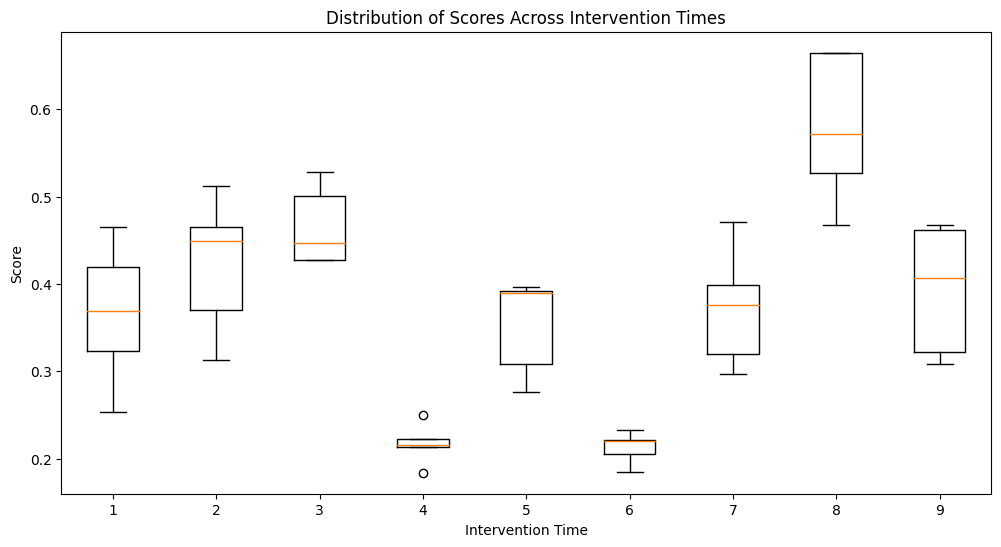

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# To replicate, put complete data here
data = {
    '1': [0.368488, 0.465249, 0.3232887, 0.25305767, 0.41946689],
    '2': [0.312576, 0.512127, 0.37030648, 0.44928616, 0.46487115],
    '3': [0.426935, 0.528289, 0.50109207, 0.42693513, 0.44637955],
    '4': [0.183791, 0.215391, 0.25018222, 0.21290369, 0.22210311],
    '5': [0.39665, 0.39232, 0.3088206, 0.27569216, 0.39002141],
    '6': [0.233269, 0.220891, 0.2056034, 0.18453797, 0.22024726],
    '7': [0.31952, 0.471197, 0.29698388, 0.39851331, 0.37614331],
    '8': [0.526561, 0.467142, 0.57211675, 0.664679, 0.66398725],
    '9': [0.406858, 0.467412, 0.30853457, 0.32221121, 0.46192455]
}

h_statistic, p_value = stats.kruskal(*data.values())

print(f"Kruskal-Wallis H-test:")
print(f"H-statistic: {h_statistic}")
print(f"p-value: {p_value}")

def permutation_test(data, num_permutations=10000):
    all_values = np.concatenate(list(data.values()))
    observed_f_statistic = stats.f_oneway(*data.values())[0]

    count = 0
    for _ in range(num_permutations):
        permuted_data = np.random.permutation(all_values)
        permuted_groups = np.array_split(permuted_data, len(data))
        permuted_f_statistic = stats.f_oneway(*permuted_groups)[0]
        if permuted_f_statistic >= observed_f_statistic:
            count += 1

    return count / num_permutations

p_value_permutation = permutation_test(data)

print(f"\nPermutation test:")
print(f"p-value: {p_value_permutation}")

plt.figure(figsize=(12, 6))
plt.boxplot(data.values(), labels=data.keys())
plt.title("Distribution of Scores Across Intervention Times")
plt.xlabel("Intervention Time")
plt.ylabel("Score")
plt.show()